<h1> <center> Taller de Análisis y visualización de datos con R </center> </h1>

<h2> <center>  1. Introducción a gráficos con ggplot  </center> </h2>

<!-- <h3> <center> Jorge Castro - jcastro@cenat.ac.cr </center> </h3>
<h3> <center> Diego Jiménez - djimenez@cenat.ac.cr </center> </h3> -->



 <table>  
  <tr>
    <td><h3>Jorge Castro</h3></td>
    <td><h3>jcastro@cenat.ac.cr</h3></td>
  </tr>  
  <tr>
    <td><h3>Diego Jiménez</h3></td>
    <td><h3>djimenez@cenat.ac.cr</h3></td>
  </tr> 
</table>

<table>  
  <tr>
    <td> <img align="left" src="img/cnca.png", width=400></td>
    <td> <img align="right" src="img/cenat.png", width=400></td>
  </tr>  
  <tr>
    <td colspan="2"> <center> <h3> Octubre 2017 </h3> </center> </td>
  </tr>  
</table>



# Contenido

1. [¿Qué es ggplot2?](#ggplot2)
<br><br>
2. [Inicio rápido con qplot](#qplot)
<br><br>
3. [Gramática de los gráficos](#gramatica)
<br><br>
4. [Gráficos con ggplot2](#graficos_ggplot2)
<br><br>
5. [Gráficos básicos en ggplot2](#graficos_basicos)
   - [Gráficos de barras](#barras)
   - [Gráficos circulares y de pastel](#circulares)
   - [Gráficos de lı́neas](#lineas)
   - [Gráficos de cajas y bigotes](#cajas)
   <br><br>
6. [Reseña](#reseña)

<a id='ggplot2'></a>
<hr>
<hr>
<h1><center><span style="color:blue">¿Qué es ggplot2?</span></center></h1>
<hr>
<hr>

# ggplot2


- Paquete de R para producción de gráficos estadı́sticos o de datos (Hadley Wickham)
- Basado en la ”gramática de los gráficos”(Leland Wilkinson)
- No limita al usuario a un conjunto predefinido de gráficos
- Describe solamente gráficos estáticos, para interactuar se deben buscar alternativas
 

In [21]:
# Instalar la biblioteca de ggplot2
#install.packages("ggplot2")

# Cargar ggplot2 para su utilización
library(ggplot2)

<a id='qplot'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Inicio rápido con qplot</span></center></h1>
<hr>
<hr>

- qplot es una abreviatura de "quick plot", el cual permite crear gráficos simples de forma rápida
- Limita al usuario a un conjunto básico de gráficos predefinidos
- Para construir gráficos más complejos, es recomendable usar ggplot2 

In [22]:
# Set de datos
#-------------------------------------------------------------------------

# Se utilizará el dataframe "diamonds" que forma parte de la biblioteca de
# ggplot. Para obtener información detallada del dataframe "diamonds"
# se puede usar el operador "?":
?diamonds

In [23]:
# Preparación de los datos
#-------------------------------------------------------------------------

#Seleccionamos un subconjunto de 100 muestras de forma aleatoria
set.seed(1410)
diamondSmall <- diamonds[sample(nrow(diamonds),100),]
diamondSmall <- diamondSmall[complete.cases(diamondSmall),]

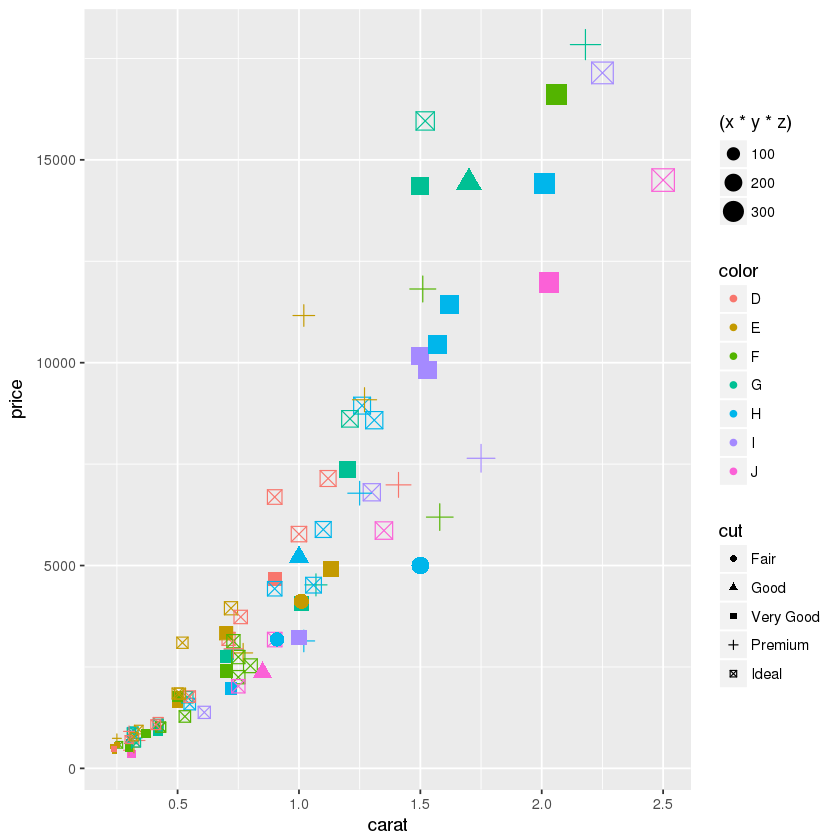

In [25]:
# Gráfico de dispersión
#--------------------------------------------------------------------------

# Gráfico de dispersión sencillo
#qplot(carat,price,data=diamondSmall)

# Podemos agregar variables al gráfico de manera sencilla
qplot(carat,price,data=diamondSmall, colour=color,shape=cut,size=(x*y*z))

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


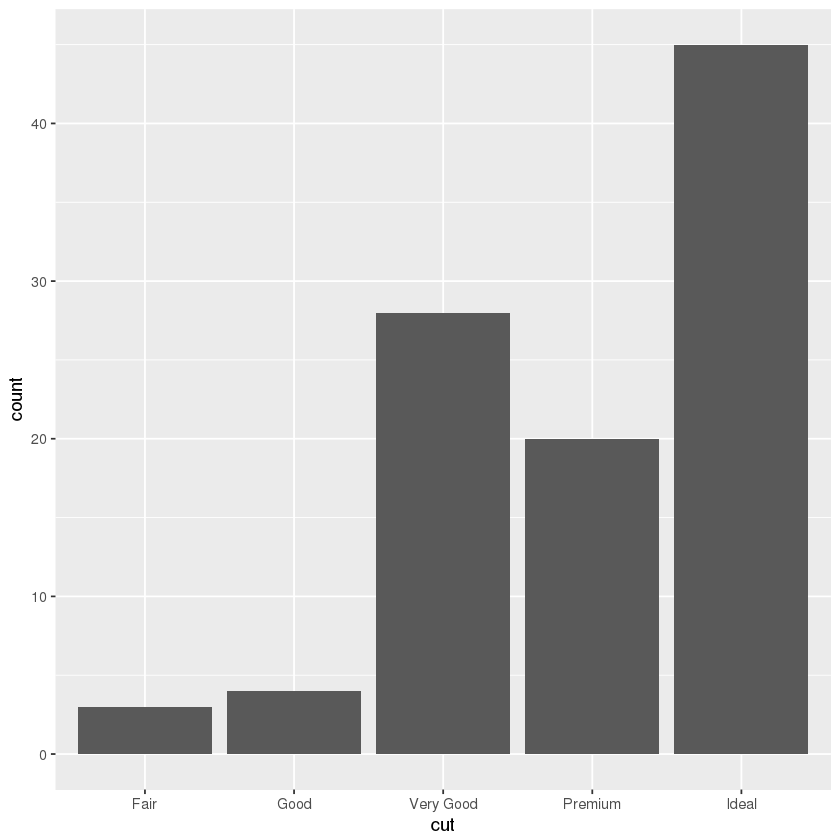

In [33]:
# Gráfico de línea y de barras
#--------------------------------------------------------------------------

#Seleccionamos solo los datos de los diamantes con corte ideal
idealDiamonds <- subset(diamondSmall,cut=="Ideal")

#Gráfico de línea
#qplot(carat,price,data=idealDiamonds,geom = c("line","point"))

#Gráficos de barras
qplot(cut,data=diamondSmall)

str(diamonds)

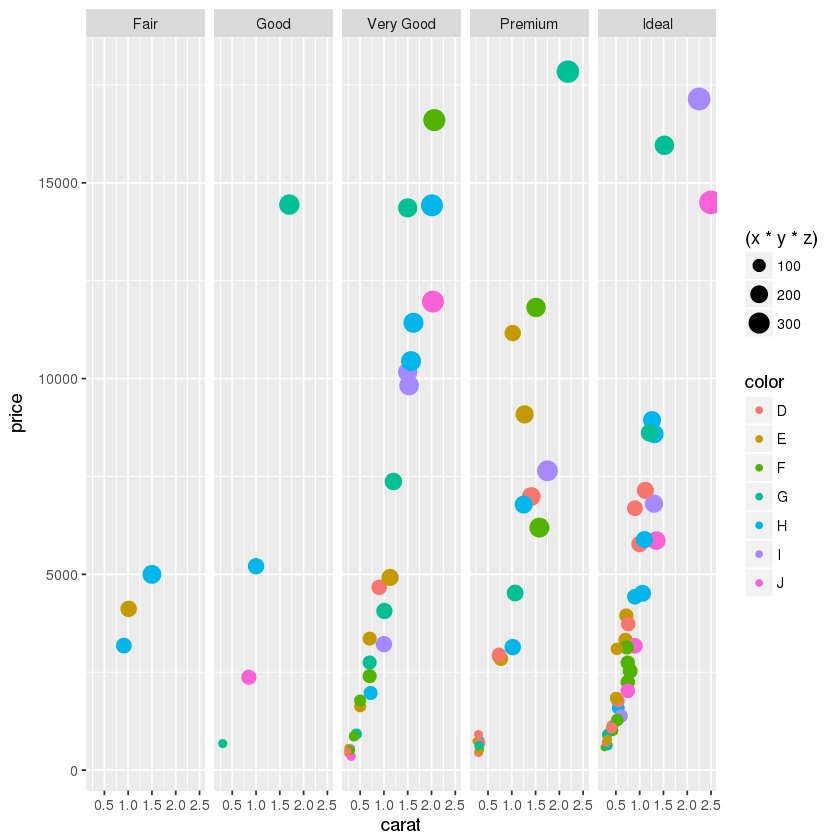

In [34]:
# Facetas
#--------------------------------------------------------------------------

#Permiten generar gráficas separadas que representan subconjuntos de
#nuestros datos, basadas en una variable de tipo factor

# Subgráficas de precio vs quilates según el tipo de corte
qplot(carat,price,data = diamondSmall,colour=color,size=(x*y*z),facets = .~cut)

<a id='gramatica'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Gramática de los gráficos</span></center></h1>
<hr>
<hr>

# Gráfico de Minard

<figure>
  <img  src="img/minard_chart.png", width=1250>
</figure> 

# Gramática de los gráficos

- Gramática: sistema formal de reglas para generar sentencias en un lenguaje (Chomsky)
    - Permite pasar de un conjunto predefinido de representaciones a un mundo casi ilimitado de gráficos
- Un gráfico es en esencia una colección de elementos u objetos
- Según Wilkinson podemos especificar un gráfico estadı́stico con los siguientes componentes gramáticos:
    - Datos
    - Transformaciones
    - Escala
    - Sistema de coordenadas
    - Elementos
    - Guı́as

<a id='graficos_ggplot2'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Gráficos con ggplot2</span></center></h1>
<hr>
<hr>

# Elementos Gramáticos

- Wickham implementa el concepto de la gramática de los gráficos con una variación: **capas**
- Permite modificar un gráfico iterativamente
- ggplot se basa en la siguiente estructura de componentes gramáticos:
    - Capas:
        - Datos y mapeos estéticos (data, aes)
        - Transformaciones estadı́sticas (stat)
        - Objetos geométricos (geom)
        - Ajustes de posición
    - Escala
    - Sistema de coordenadas (coord)
    - Facetas (facet)

# Capas 

- Datos (data): conjunto de mediciones u observaciones de interés. Deben estar almacenadas en un marco de datos (dataframe)
- Propiedades estéticas (aes): atributos visuales que podemos percibir en un gráfico. Cada atributo puede ser mapeado a una variable o a un valor fijo.
- Objetos geométricos (geom): establecen las formas o figuras que se utilizan en un gráfico
- Transformaciones estadı́sticas (stat): operaciones estadı́sticas de caracterización de los datos


# Otros componentes

- Escalas: controlan el mapeo de los datos a las propiedades estéticas. Se requiere una escala por cada atributo estético
- Sistema de coordenadas (coord) : determina la posición de los diferentes componentes visuales en el plano de la gráfica.
- Faceta (facet): tabla de gráficos basada en subgrupos de los datos.
- https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/

Warning message:
“Ignoring unknown aesthetics: x, y”

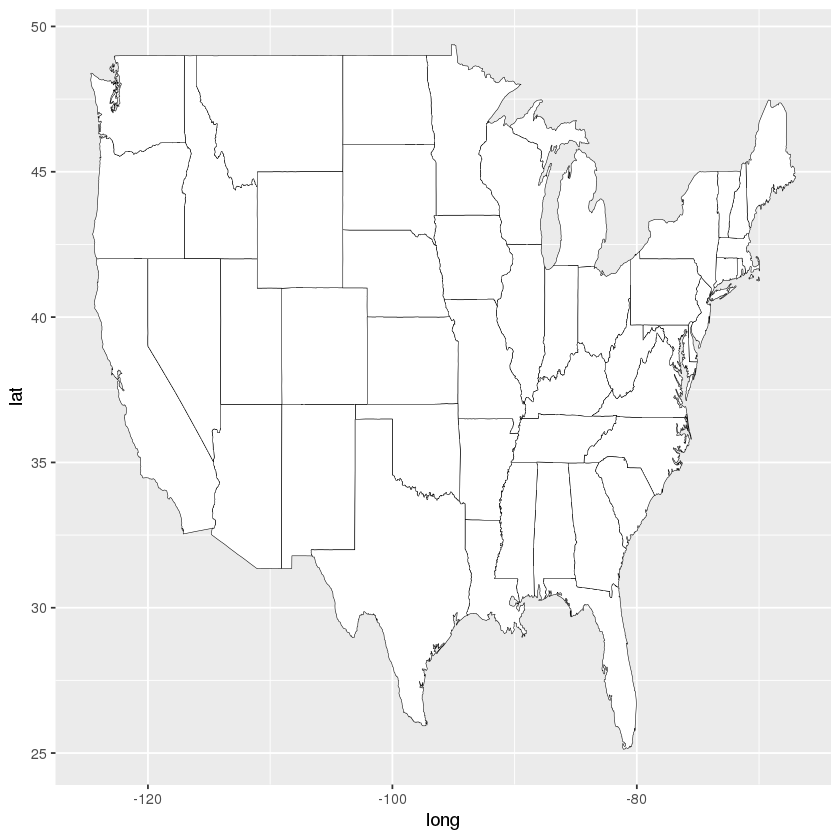

In [35]:
#Construyendo un gráfico capa por capa
#--------------------------------------------------------------------------

#Instalar paquete de fivethirtyeight
#install.packages("fivethirtyeight")
library(fivethirtyeight)
#Cargamos el paquete de ggplot2 para graficar
library(ggplot2)
#Cargamos el paquete de mapas
library(maps)
#Convertimos la información del mapa a un data frame para visualizar con ggplot
us_states <- map_data("state")
#Del conjunto de datos vamos a seleccionar solo las columnas con los datos de interés
columns <- c("state","hate_crimes_per_100k_splc","avg_hatecrimes_per_100k_fbi")
crimes <- hate_crimes[columns]
crimes$state <- tolower(crimes$state)

#Creamos un gráfico sobre el cual iremos agregando capas
myFirstGraphic <- ggplot()

#Agregamos una primera capa con el mapa de los Estados Unidos
myFirstGraphic <- myFirstGraphic + geom_map(data=us_states, map=us_states,
                    aes(x=long,y=lat, map_id=region),
                    fill="#ffffff", color="#000000", size=0.15)
myFirstGraphic

In [ ]:
#Agregamos la segunda capa
#--------------------------------------------------------------------------

#La segunda capa corresponde a los datos de interés
myFirstGraphic <- myFirstGraphic + geom_map(data=crimes, map=us_states,
                    aes(fill=avg_hatecrimes_per_100k_fbi, map_id=state),
                    color="#ffffff", size=0.15)

# Podemos modificar la apariencia "agregando" propiedades, en este caso, la escala de colores
myFirstGraphic <- myFirstGraphic + scale_fill_continuous(name="Average Hate Crimes",
                     low = "lightskyblue1", high = "cadetblue4", guide="colorbar")

#Removemos las etiquetas de los ejes convirtiendo sus valores a nulos.
myFirstGraphic <- myFirstGraphic + labs(x=NULL, y=NULL)

#Modificamos el aspecto general de la visualización
# 1) Quitamos el fondo gris
myFirstGraphic <- myFirstGraphic + theme(panel.border = element_blank())
myFirstGraphic <- myFirstGraphic + theme(panel.background = element_blank())

# 2) Removemos las marcas de los ejes y sus leyendas
myFirstGraphic <- myFirstGraphic + theme(axis.ticks = element_blank(),
                    axis.text = element_blank())

# 3) Agregamos un título a nuestro gráfico
myFirstGraphic <- myFirstGraphic + ggtitle("Average annual hate crimes per 100k population,
                    2010-2015")+theme(plot.title = element_text(hjust = 0.7))

myFirstGraphic


<a id='graficos_basicos'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Gráficos básicos en ggplot</span></center></h1>
<hr>
<hr>

# Gráficos de barras <a id='barras'></a>

- En ggplot se utiliza el geom de barras: geom_bar()
- https://fivethirtyeight.com/datalab/how-baby-boomers-get-high/

X,drug,frequency,use
1,Marijuana,52,7.3
2,Pain reliever,12,2.5
3,Tranquilizer,10,1.4
4,Cocaine,36,0.9
5,Crack,62,0.4
6,OxyContin,5,0.4


'data.frame':	12 obs. of  4 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ drug     : Factor w/ 12 levels "Cocaine","Crack",..: 6 9 12 1 2 8 11 3 10 5 ...
 $ frequency: num  52 12 10 36 62 5 24 44 104 13.5 ...
 $ use      : num  7.3 2.5 1.4 0.9 0.4 0.4 0.3 0.3 0.2 0.2 ...


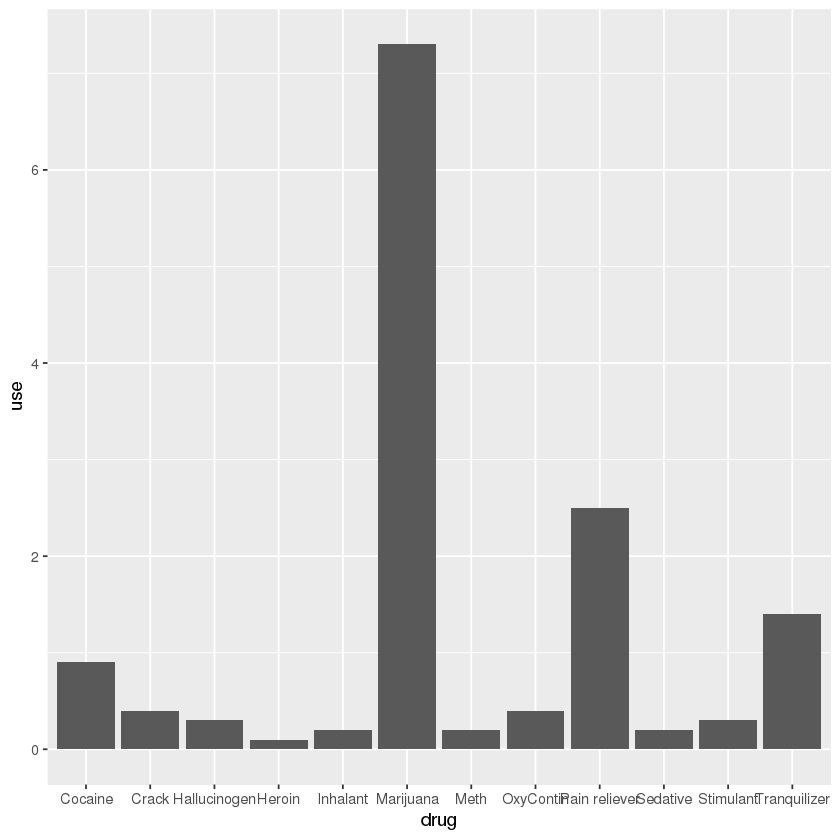

In [46]:
data <- read.csv("dataset/babyboomers_druguse.csv")

bar_plot <- ggplot(data,aes(x=drug,y=use))+geom_bar(stat = "identity")
bar_plot

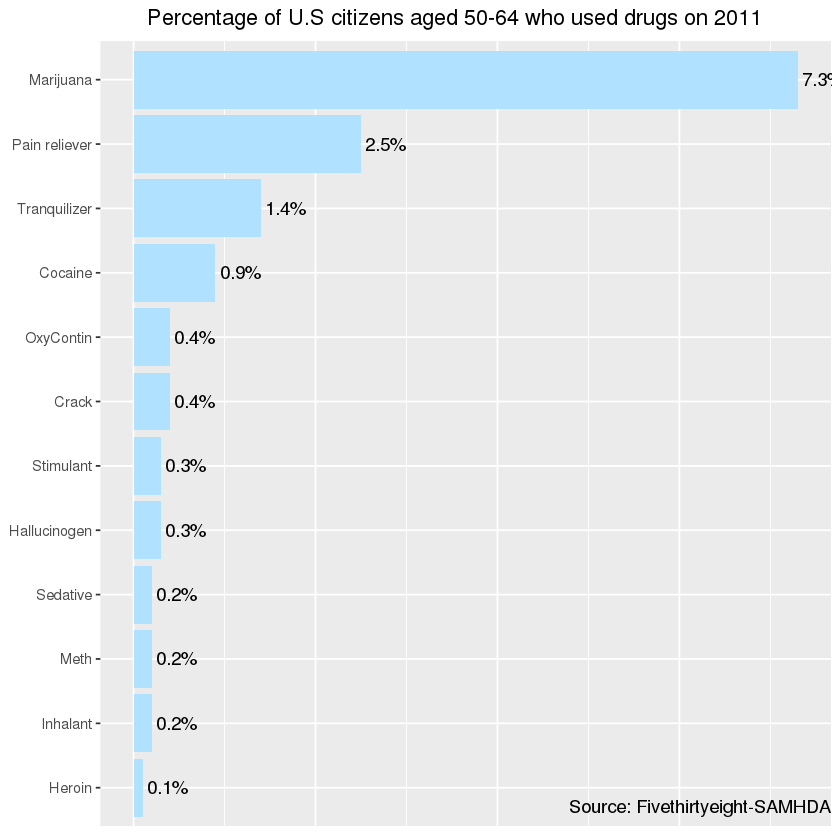

In [50]:
#Podemos modificar la apariencia del gráfico (orientación, color, textos)
bar_plot <- ggplot(data,aes(x=reorder(drug,use),y=use))+geom_bar(stat = "identity",fill="lightskyblue1") #5987B2")

#Giramos el gráfico
bar_plot <- bar_plot + coord_flip()

#Agregamos etiquetas de valor a cada barra
bar_plot <- bar_plot + geom_text(aes(y=use), label=scales::percent(data$use/100),stat = "identity",hjust=-0.1)

#Eliminamos marcadores en el eje x 
bar_plot <- bar_plot + labs(x=NULL, y=NULL)
bar_plot <- bar_plot + theme(axis.ticks.x = element_blank(),axis.text.x = element_blank())

#Agregamos una anotación sobre el gráfico
bar_plot <- bar_plot + annotate("text", x=-Inf, y=Inf, label="Source: Fivethirtyeight-SAMHDA", hjust=1, vjust=-1)

#Utilizamos ggtitle para agregar un título
bar_plot <- bar_plot + ggtitle("Percentage of U.S citizens aged 50-64 who used drugs on 2011") + theme(plot.title = element_text(hjust = 0.4))

bar_plot

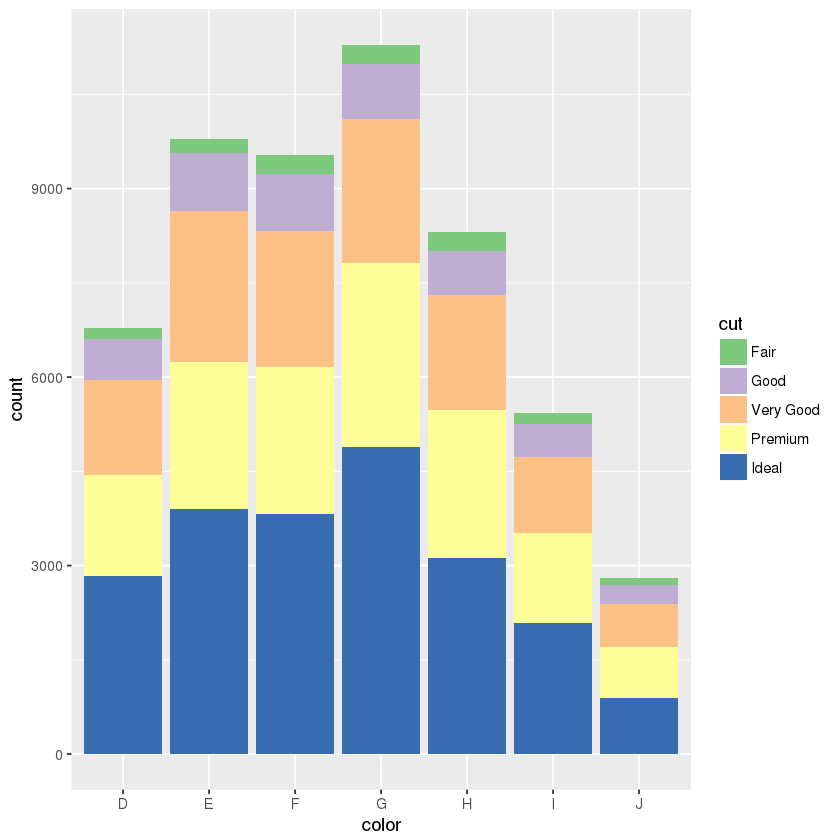

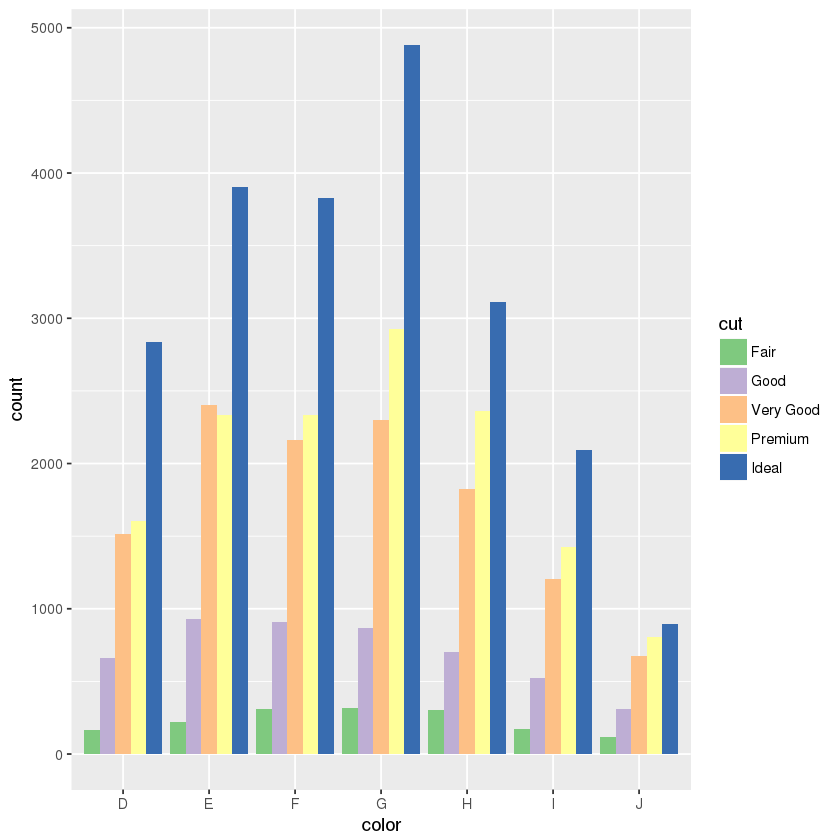

In [52]:
#Gráfico de barras apiladas y agrupadas

#install.packages("RColorBrewer")

#Barras apiladas
stacked <- ggplot(diamonds,aes(x=color,fill=cut)) + geom_bar(stat = "count",position="stack") + 
scale_fill_brewer(palette = "Accent")


stacked

#Barras agrupadas
grouped <- ggplot(diamonds,aes(x=color,fill=cut)) + geom_bar(stat = "count",position="dodge") + 
scale_fill_brewer(palette = "Accent")

grouped

# Gráficos circulares y de pastel <a id='circulares'></a>

- Para construir gráficos circulares se deben usar las coordenadas polares: coord_polar()

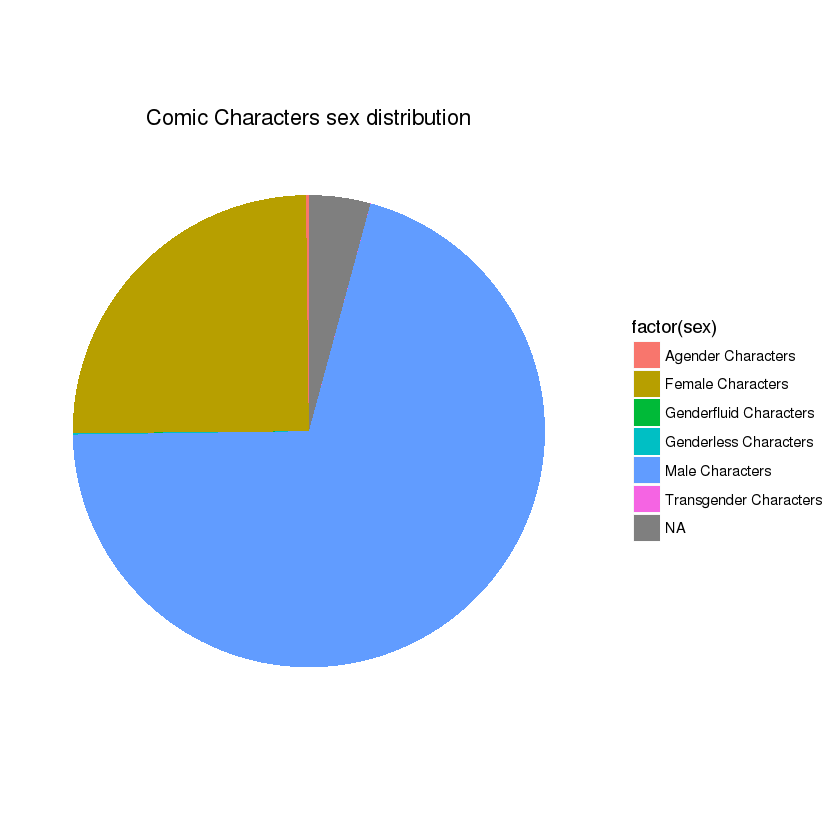

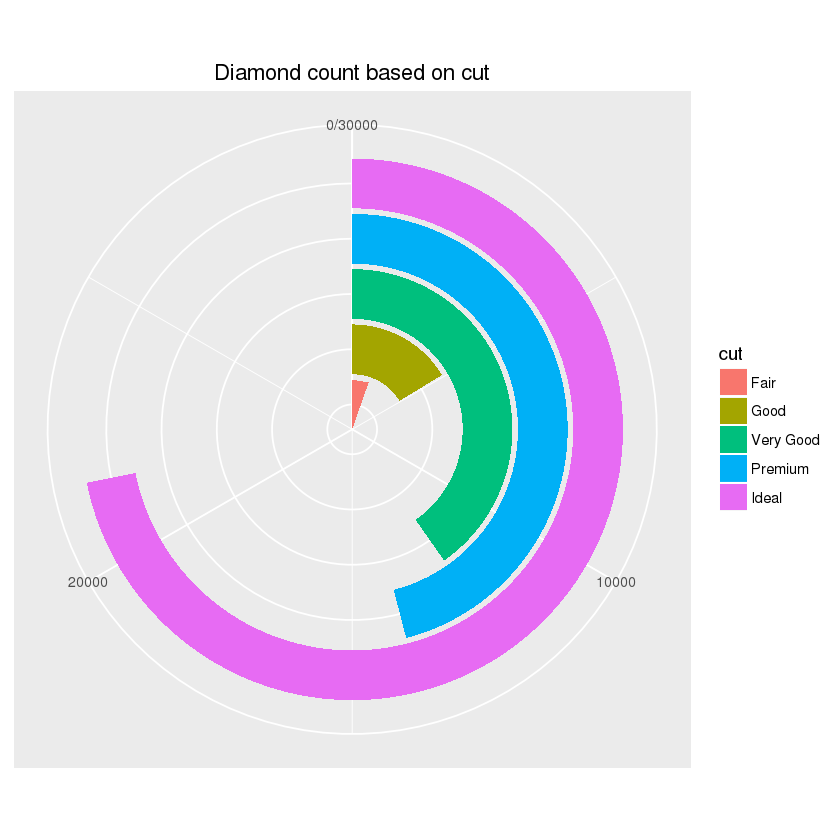

In [58]:
#Podemos crear un gráfico basado en variables categóricas
pie <- ggplot(comic_characters,aes(x=factor(1),fill=factor(sex)))+geom_bar(width = 1)
pie <- pie+coord_polar(theta="y")
pie <- pie + labs(x=NULL,y=NULL) + theme(axis.ticks = element_blank(),axis.text = element_blank(),
           panel.background = element_blank(), panel.border = element_blank()) +
       ggtitle("Comic Characters sex distribution") + theme(plot.title = element_text(hjust = 0.5))

pie

#También podemos construir un gráfico de barras, circular, para un conteo
circular_barplot <- ggplot(diamonds,aes(x=cut,fill=cut)) + geom_bar(stat = "count") 
circular_barplot <- circular_barplot + coord_polar(theta="y") + ylim(c(0,30000))
circular_barplot <- circular_barplot + labs(x=NULL,y=NULL) + ggtitle("Diamond count based on cut") + theme(plot.title = element_text(hjust = 0.5), axis.text.y = element_blank(),axis.ticks.y  = element_blank())
circular_barplot

# Gráficos de líneas <a id='lineas'></a>

- Despliegan información de puntos de una serie, unidos por una lı́nea.
- Es uno de los tipos más básicos de gráficos, y se usa casi en todos los campos.
- A menudo se utiliza para visualizar tendencias sobre datos.
- En ggplot se utiliza el geom de lı́nea: geom line().

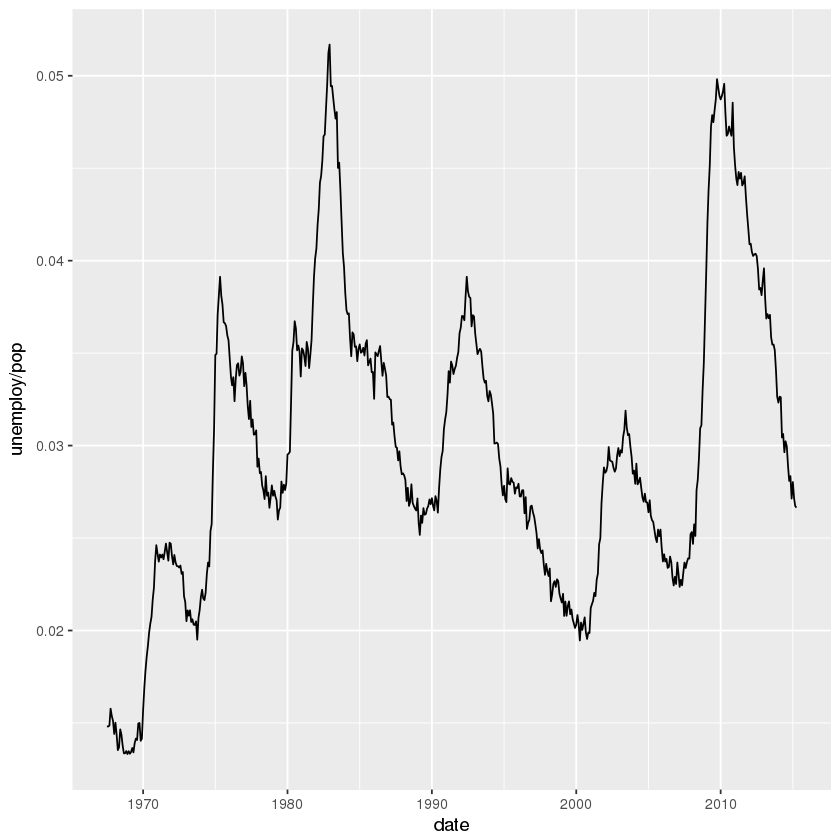

In [59]:
line_plot <- ggplot(economics, aes(x=date, y=unemploy/pop)) + geom_line()
line_plot

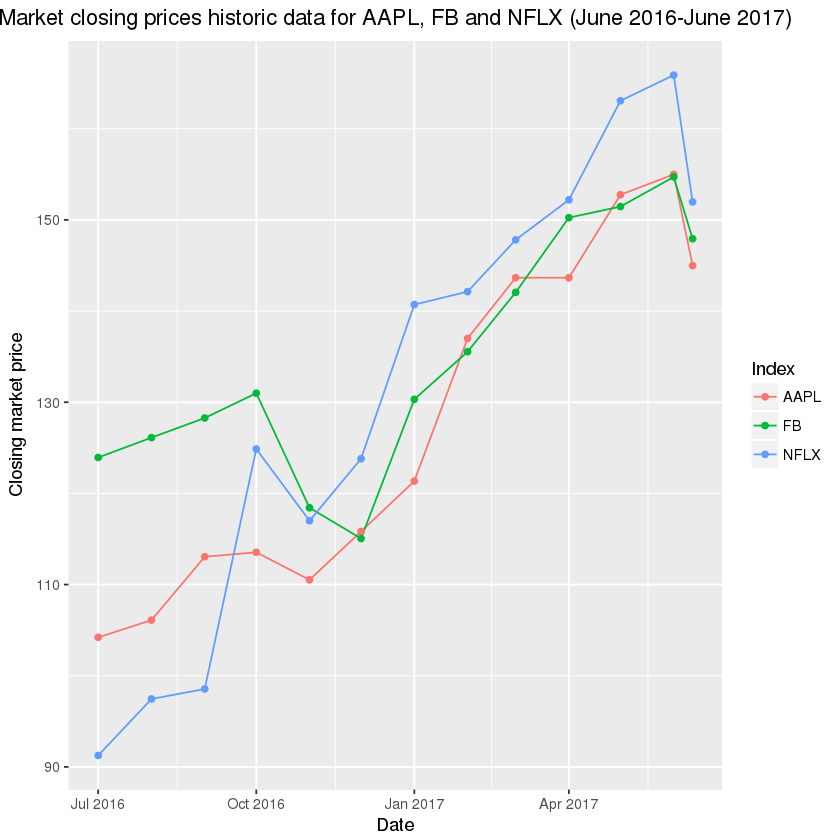

In [60]:
#Podemos crear gráficos con múltiples líneas
#Leemos los archivos con la información de mercado, uno por cada índice de interés
apple <- read.csv("dataset/AAPL.csv")
facebook <- read.csv("dataset/FB.csv")
netflix <- read.csv("dataset/NFLX.csv")

#Debemos acomodar los datos para que queden en un único data frame. Nos interesa visualizar los datos por índice.
apple <- cbind(Index = "AAPL", apple)
facebook <- cbind(Index = "FB", facebook)
netflix <- cbind(Index = "NFLX", netflix)

#Unimos los data frames haciendo uso de la función merge (Deben ser iguales en estructura)
data_temp <- merge(apple,facebook, all = TRUE)
stock <- merge(data_temp,netflix, all = TRUE)
stock$Date <- as.Date(stock$Date, format = "%Y-%m-%d")
stock<-stock[order(stock$Date),]

#Creamos el gráfico con ggplot diferenciando por color los índices. 
multiple_lines <- ggplot(data = stock,aes(x= Date,y=Close, color=Index))+geom_line()+geom_point() 
multiple_lines <- multiple_lines + ggtitle("Market closing prices historic data for AAPL, FB and NFLX (June 2016-June 2017)")+theme(plot.title = element_text(hjust = 0.5))+labs(y="Closing market price")
multiple_lines

# Gráficos de cajas y bigotes <a id='cajas'></a>

- Basados en cuartiles y compuestos por:
    - Rectángulo (la "caja")
    - Dos brazos (los "bigotes")
- Suministran información sobre
    - Valores mı́nimo y máximo
    - Cuartiles Q1, Q2 y Q3
    - Valores atı́picos
    - Simetrı́a de la distribución
- Si la mediana no está en el centro del rectángulo, la distribución no es simétrica.
- En ggplot se utiliza el geom de caja: geom boxplot().

<figure>
  <img  src="img/boxplot.png", width=700>
</figure> 

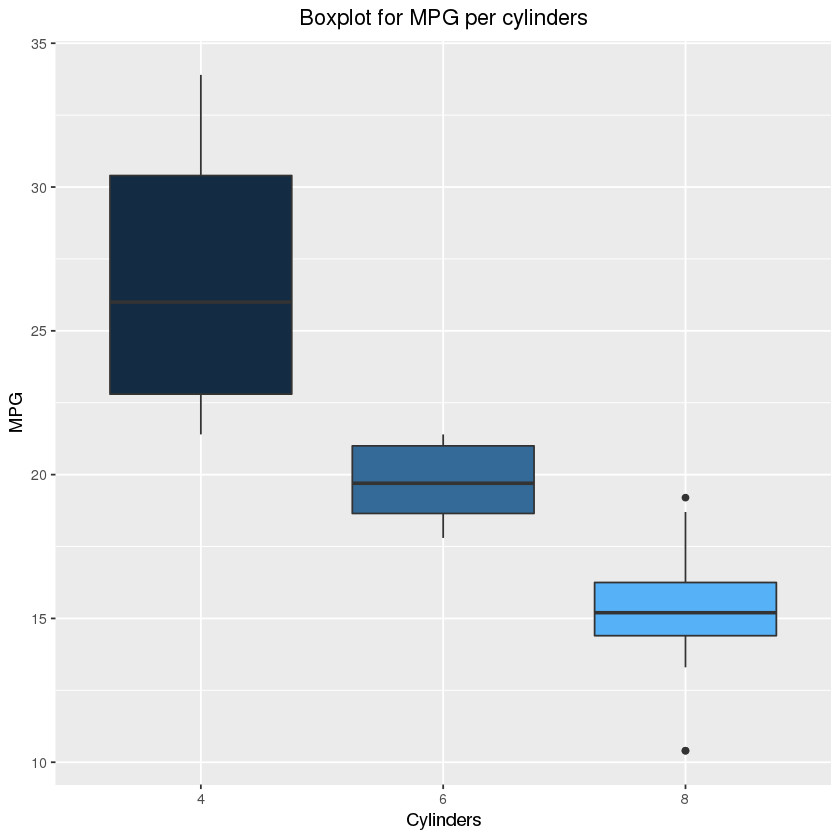

In [61]:
#Para crear el gráfico de cajas y bigotes utilizamos geom_boxplot()
# Utilizamos el conjunto de datos de mtcars: ?mtcars
box_plot <- ggplot(data = mtcars, aes(x=factor(cyl), y=mpg, group=cyl, fill=cyl))+geom_boxplot()

box_plot <- ggplot(data = mtcars, aes(x=factor(cyl), y=wt, group=cyl, fill=cyl)) + geom_boxplot() + ggtitle("Boxplot for Weight")+theme(plot.title = element_text(hjust = 0.5))+labs(x="Cylinders", y="Weight")

#MPG = Miles per Galon
#Preparamos el gráfico para presentación, eliminamos la leyenda de colores. 
box_plot <- ggplot(data = mtcars, aes(x=factor(cyl), y=mpg, group=cyl, fill=cyl))+geom_boxplot() + ggtitle("Boxplot for MPG per cylinders")+theme(plot.title = element_text(hjust = 0.5), legend.position = "none")+labs(x="Cylinders", y="MPG")

box_plot

<a id='reseña'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Reseña</span></center></h1>
<hr>
<hr>

- Con ggplot construimos gráficos por capas. Estas capas pueden ser divididas en:
    - **Capas de datos**: permiten explorar y visualizar diferentes datos del gráfico
    - **Capas estadı́sticas**: permiten desplegar modelos de predicción en el contexto de los datos. Esto permite revelar tendencias o comportamientos que de otra forma no podrı́an apreciarse.
    - **Capas de metadatos**: anotaciones, etiquetas y textos que permiten la interpretación de los datos en el gráfico.
- La descomposición o abstracción de componentes gramáticos en una gráfico, permite generar visualizaciones personalizadas que se basan en estos principios.
- ggplot2 solo permite construir **gráficos estáticos** por lo que se debe recurrir a otros paquetes o bibliotecas.
- ggplot2 solo permite construir gráficos a partir de marcos de datos por lo que el usuario se ve forzado a reestructurar la información.
- Documentación en línea de ggplot2: http://ggplot2.tidyverse.org/reference/

<a id='ejercicios'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Práctica de ggplot</span></center></h1>
<hr>
<hr>

# Ejercicio

A partir del set de datos sobre percepción de corrupción (CPI) e índice de desarrollo humano (HDI) en 173 países, disponible en "dataset/EconomistData.csv" replique el siguiente gráfico: 

<img src="img/economist1.png" height="500px"  />

Fuente del gráfico: http://www.economist.com/node/21541178

## Recuerde

- Realizar mapeos estéticos
- Definir geometría del gráfico 
- Agregar línea de tendencia (puede hacer uso de la función *geom_smooth()*)
- Modificar estética de los puntos (usar geom_point() y documentación en línea: http://ggplot2.tidyverse.org/articles/ggplot2-specs.html)

In [67]:
dat <- read.csv("dataset/EconomistData.csv")
head(dat)

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia
